The following code will the total amount of shares given the company's ticket.

In [56]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
base_url = 'https://financials.morningstar.com/ratios/r.html?t='
ticket = input("input ticket: ").upper()

input ticket: aapl


In [48]:
def make_url(base, comp):
    url = base + comp
    return url

finished_url = make_url(base_url,ticket)
finished_url

'https://financials.morningstar.com/ratios/r.html?t=AAPL'

In [49]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)
driver.get(finished_url)
html_doc = driver.page_source

In [50]:
driver.quit()
soup = BeautifulSoup(html_doc,'lxml')
#print(soup.prettify())

In [51]:
Y0 = soup.tbody.find('td', headers= 'Y0 i7').text
Y1 = soup.tbody.find('td', headers= 'Y1 i7').text
Y2 = soup.tbody.find('td', headers= 'Y2 i7').text
Y3 = soup.tbody.find('td', headers= 'Y3 i7').text
Y4 = soup.tbody.find('td', headers= 'Y4 i7').text
Y5 = soup.tbody.find('td', headers= 'Y5 i7').text
Y6 = soup.tbody.find('td', headers= 'Y6 i7').text
Y7 = soup.tbody.find('td', headers= 'Y7 i7').text
Y8 = soup.tbody.find('td', headers= 'Y8 i7').text
Y9 = soup.tbody.find('td', headers= 'Y9 i7').text
Y10 = soup.tbody.find('td', headers= 'Y10 i7').text

In [52]:
years = soup.find('tr')
y0 = years.find('th', id='Y0').text
y1 = years.find('th', id='Y1').text
y2 = years.find('th', id='Y2').text
y3 = years.find('th', id='Y3').text
y4 = years.find('th', id='Y4').text
y5 = years.find('th', id='Y5').text
y6 = years.find('th', id='Y6').text
y7 = years.find('th', id='Y7').text
y8 = years.find('th', id='Y8').text
y9 = years.find('th', id='Y9').text
y10 = years.find('th', id='Y10').text

In [53]:
data = {'Year': [y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10], 
        'Shares in m': [Y0 ,Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9, Y10]}

In [54]:
df = pd.DataFrame (data, columns = ['Year','Shares in m'])
df.style.set_caption("Ticket: " + ticket)

,Year,Shares in m
0,2010-09,"6,473"
1,2011-09,"6,557"
2,2012-09,"6,617"
3,2013-09,"6,522"
4,2014-09,"6,123"
5,2015-09,"5,793"
6,2016-09,"5,500"
7,2017-09,"5,252"
8,2018-09,"5,000"
9,2019-09,"4,649"


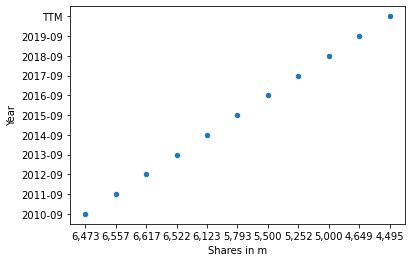

In [61]:
df.plot(x ='Shares in m', y='Year', kind = 'scatter')
plt.show()